# Requirements

In [ ]:
# Add as many imports as you need.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import missingno as msno

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [46]:
data = pd.read_csv('./data/user_behavior_data.csv')

Preprocess the input and the output variables appropriately.

In [47]:
# Write your code here. Add as many boxes as you need.

In [21]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


In [41]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [48]:
encoder = OrdinalEncoder()

In [49]:
data.drop(columns=['User ID'], inplace=True)

In [51]:
columns_to_encode = ['Device Model', 'Operating System', 'Gender']

In [52]:
data[columns_to_encode] = encoder.fit_transform(data[columns_to_encode])

In [53]:
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0.0,0.0,393,6.4,1872,67,1122.0,40.0,1.0,4
1,1.0,0.0,268,4.7,1331,42,944.0,47.0,0.0,3
2,3.0,0.0,154,4.0,761,32,NaN,42.0,1.0,2
3,0.0,0.0,239,4.8,1676,56,871.0,20.0,1.0,3
4,4.0,1.0,187,4.3,1367,58,988.0,31.0,0.0,3


In [18]:
#data['Device Model'] = encoder.fit_transform(data['Device Model'])
#data['Operating System'] = encoder.fit_transform(data['Operating System'])
#data['Gender'] = encoder.fit_transform(data['Gender'])

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [54]:
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0.0,0.0,393,6.4,1872,67,1122.0,40.0,1.0,4
1,1.0,0.0,268,4.7,1331,42,944.0,47.0,0.0,3
2,3.0,0.0,154,4.0,761,32,NaN,42.0,1.0,2
3,0.0,0.0,239,4.8,1676,56,871.0,20.0,1.0,3
4,4.0,1.0,187,4.3,1367,58,988.0,31.0,0.0,3


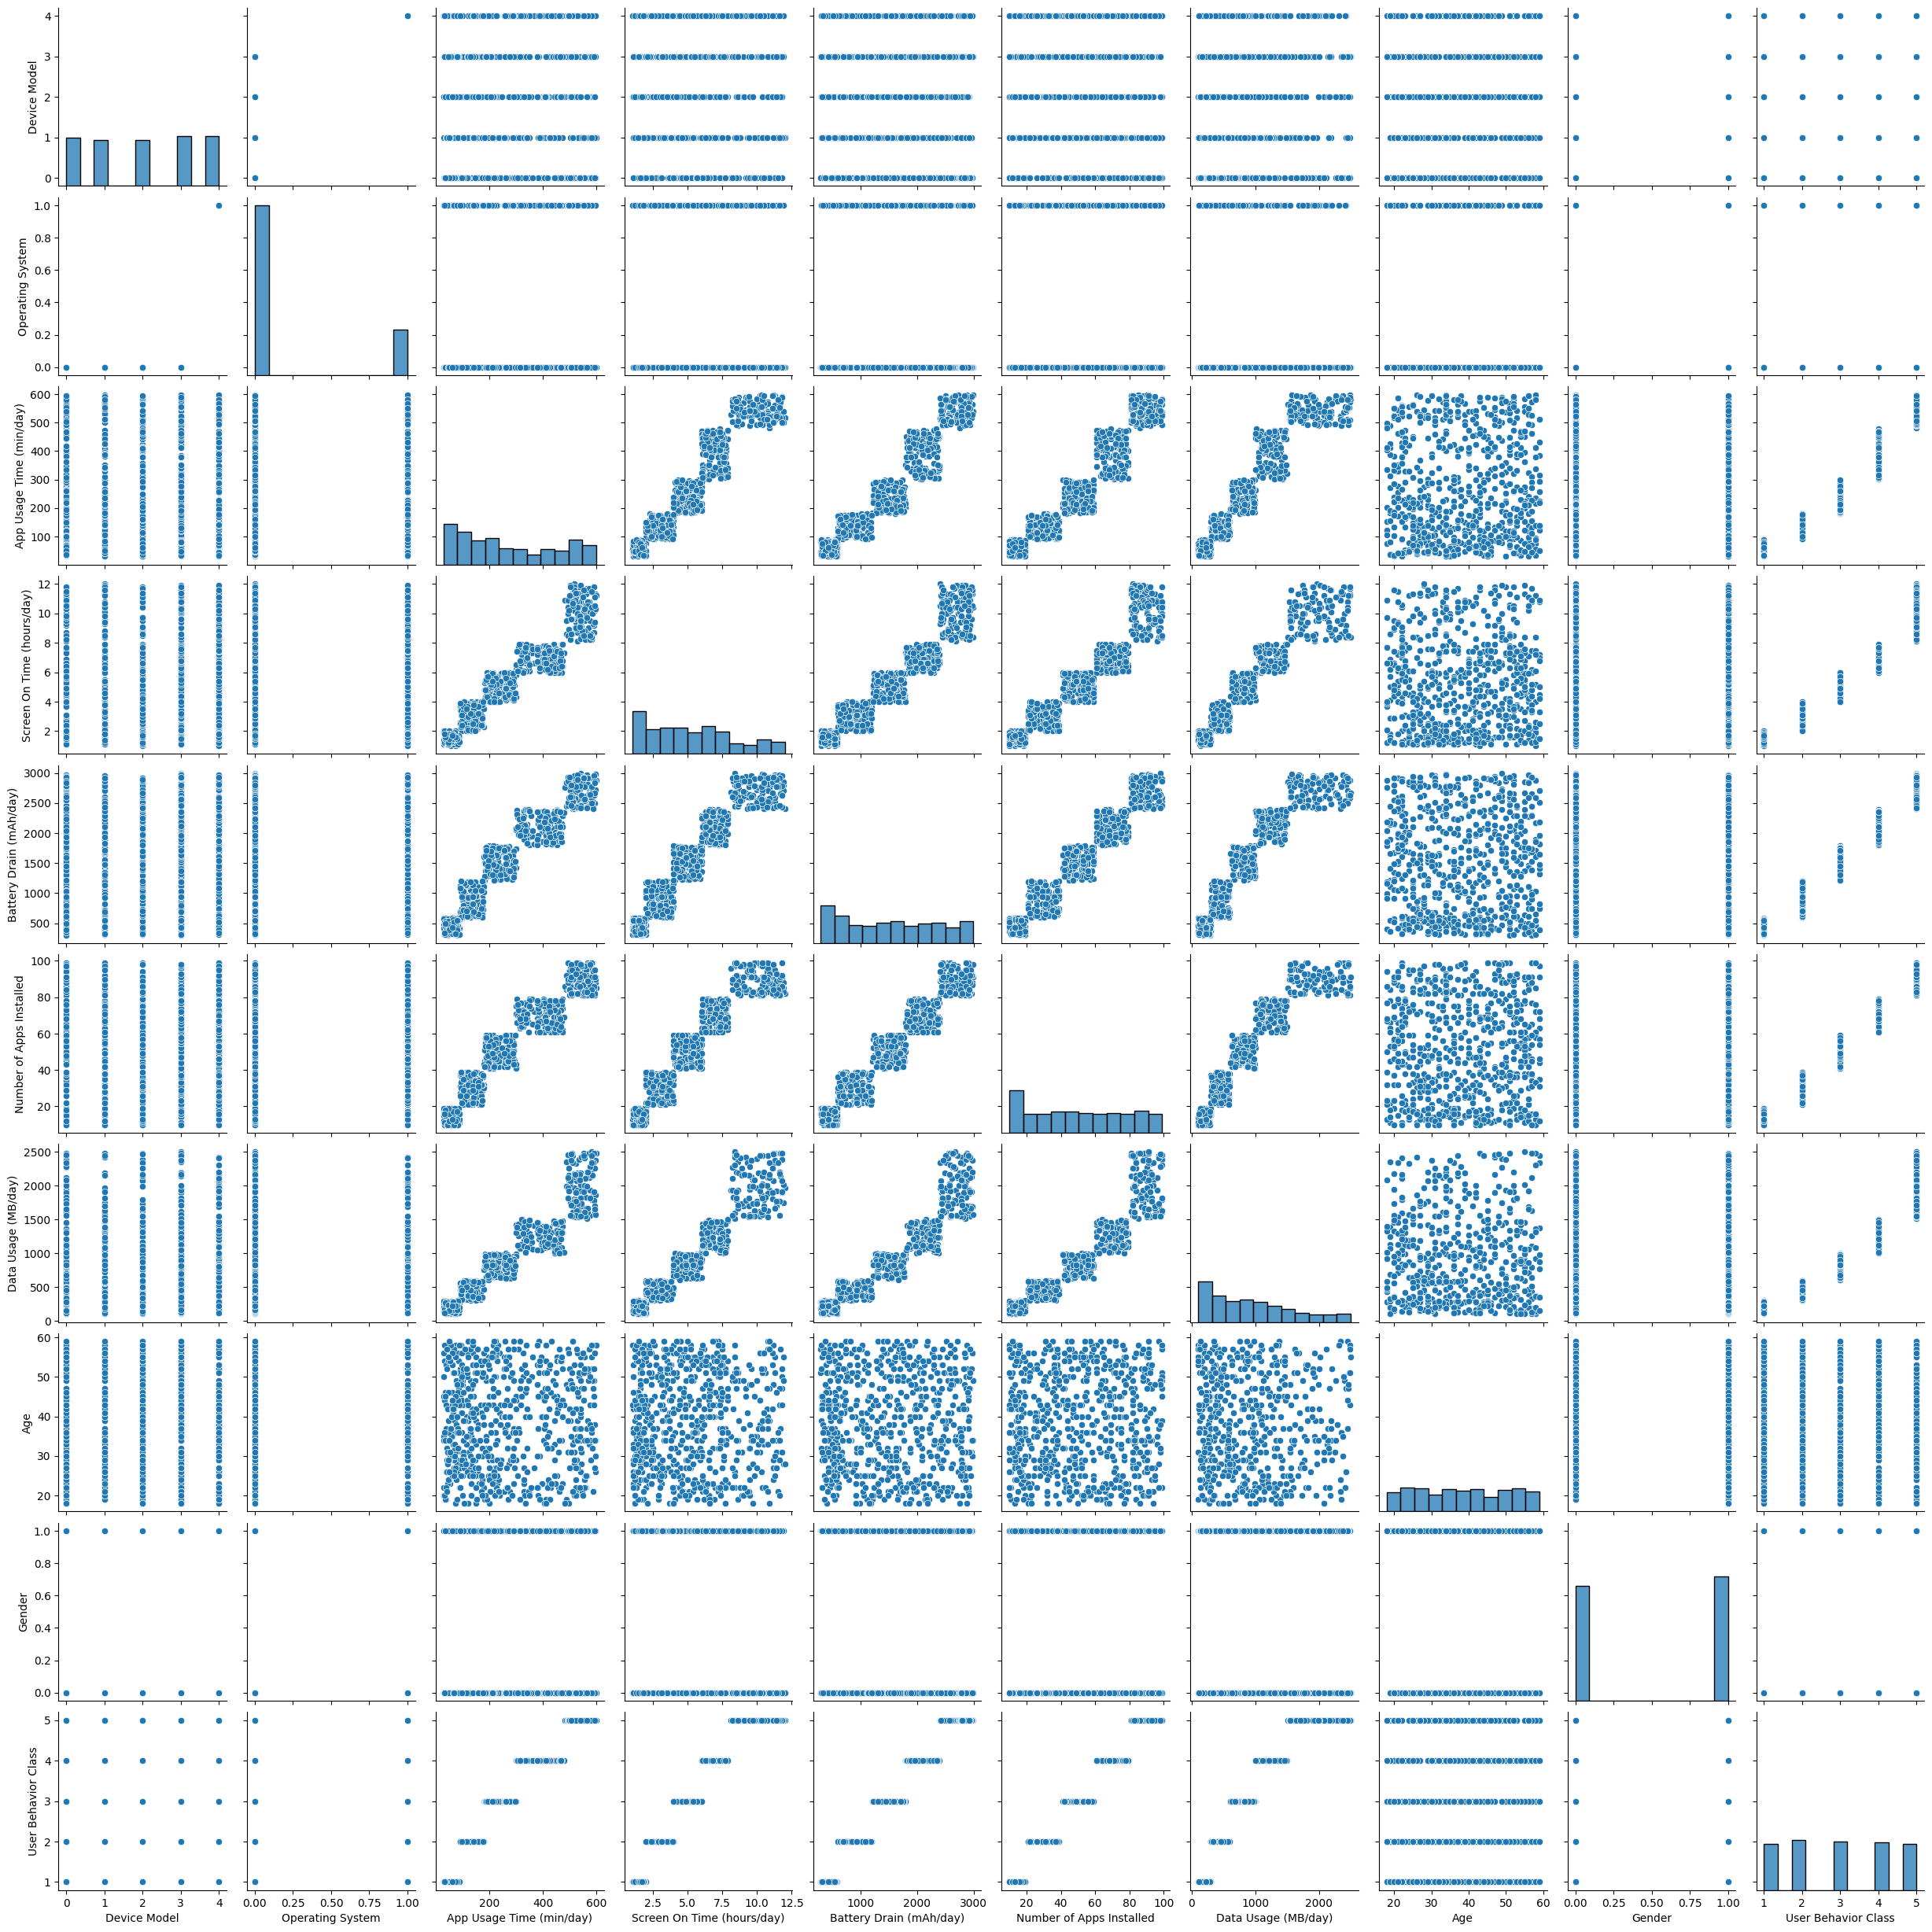

In [55]:
sns.pairplot(data)

In [57]:
data.describe()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.000000,630.000000,700.000000,700.000000,700.000000,700.000000,560.000000,665.000000,700.000000,700.000000
mean,2.030000,0.212698,271.128571,5.272714,1525.158571,50.681429,942.332143,38.342857,0.520000,2.990000
std,1.430493,0.409541,177.199484,3.068584,819.136414,26.943324,651.190675,12.038081,0.499957,1.401476
min,0.000000,0.000000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,0.000000,1.000000
25%,1.000000,0.000000,113.250000,2.500000,722.250000,26.000000,370.750000,28.000000,0.000000,2.000000
50%,2.000000,0.000000,227.500000,4.900000,1502.500000,49.000000,827.500000,38.000000,1.000000,3.000000
75%,3.000000,0.000000,434.250000,7.400000,2229.500000,74.000000,1377.750000,49.000000,1.000000,4.000000
max,4.000000,1.000000,598.000000,12.000000,2993.000000,99.000000,2493.000000,59.000000,1.000000,5.000000


Check if the dataset is balanced.

In [ ]:
# Write your code here. Add as many boxes as you need.

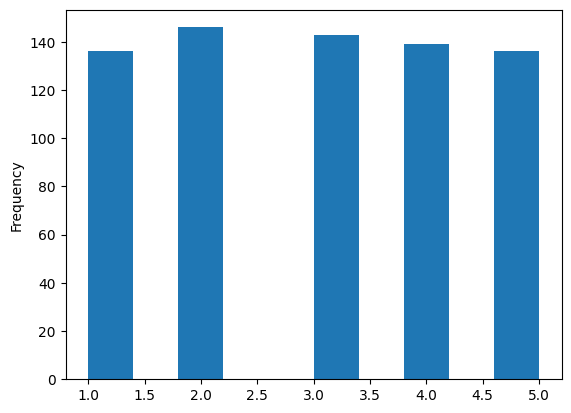

In [58]:
data['User Behavior Class'].plot.hist()
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [56]:
data.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [59]:
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage = missing_percentage.reset_index().rename(columns={'index': 'Column', 0: 'Missing Percentage'})
missing_percentage

,Column,Missing Percentage
0,Device Model,0.0
1,Operating System,10.0
2,App Usage Time (min/day),0.0
3,Screen On Time (hours/day),0.0
4,Battery Drain (mAh/day),0.0
5,Number of Apps Installed,0.0
6,Data Usage (MB/day),20.0
7,Age,5.0
8,Gender,0.0
9,User Behavior Class,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [61]:
import missingno as msno

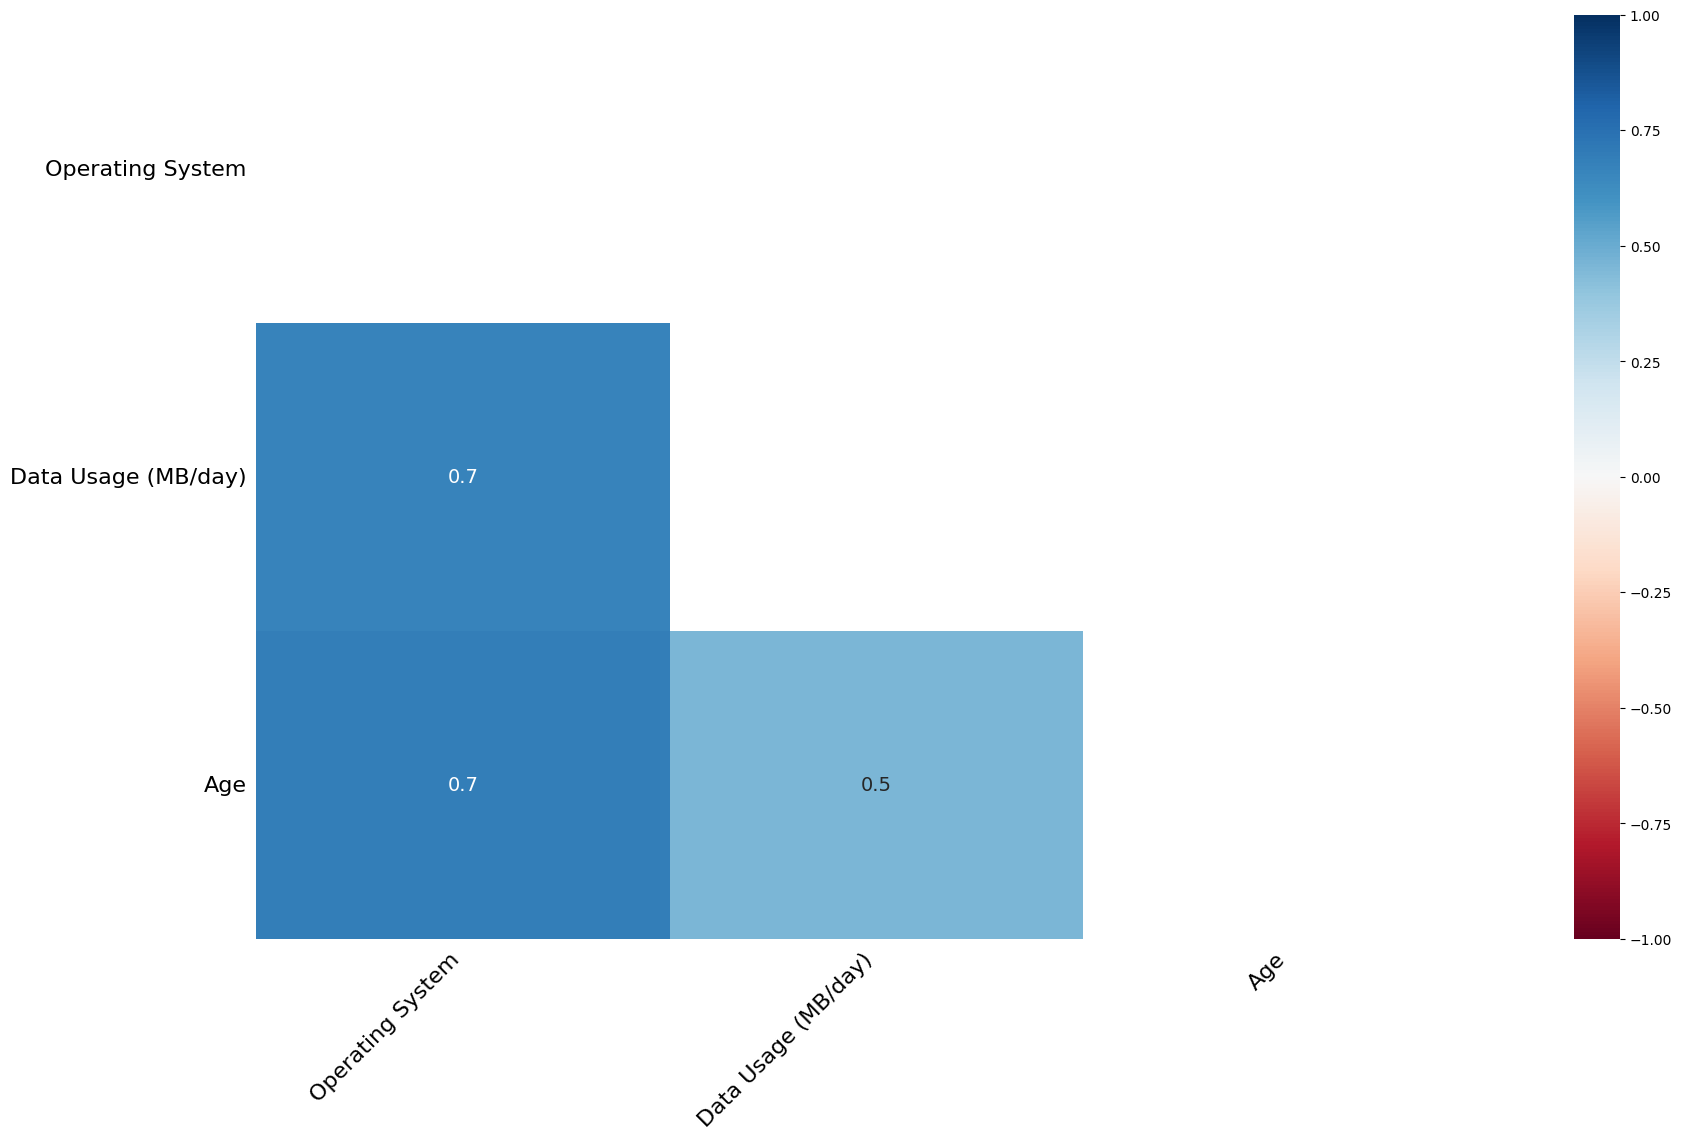

In [62]:
msno.heatmap(data)
plt.show()

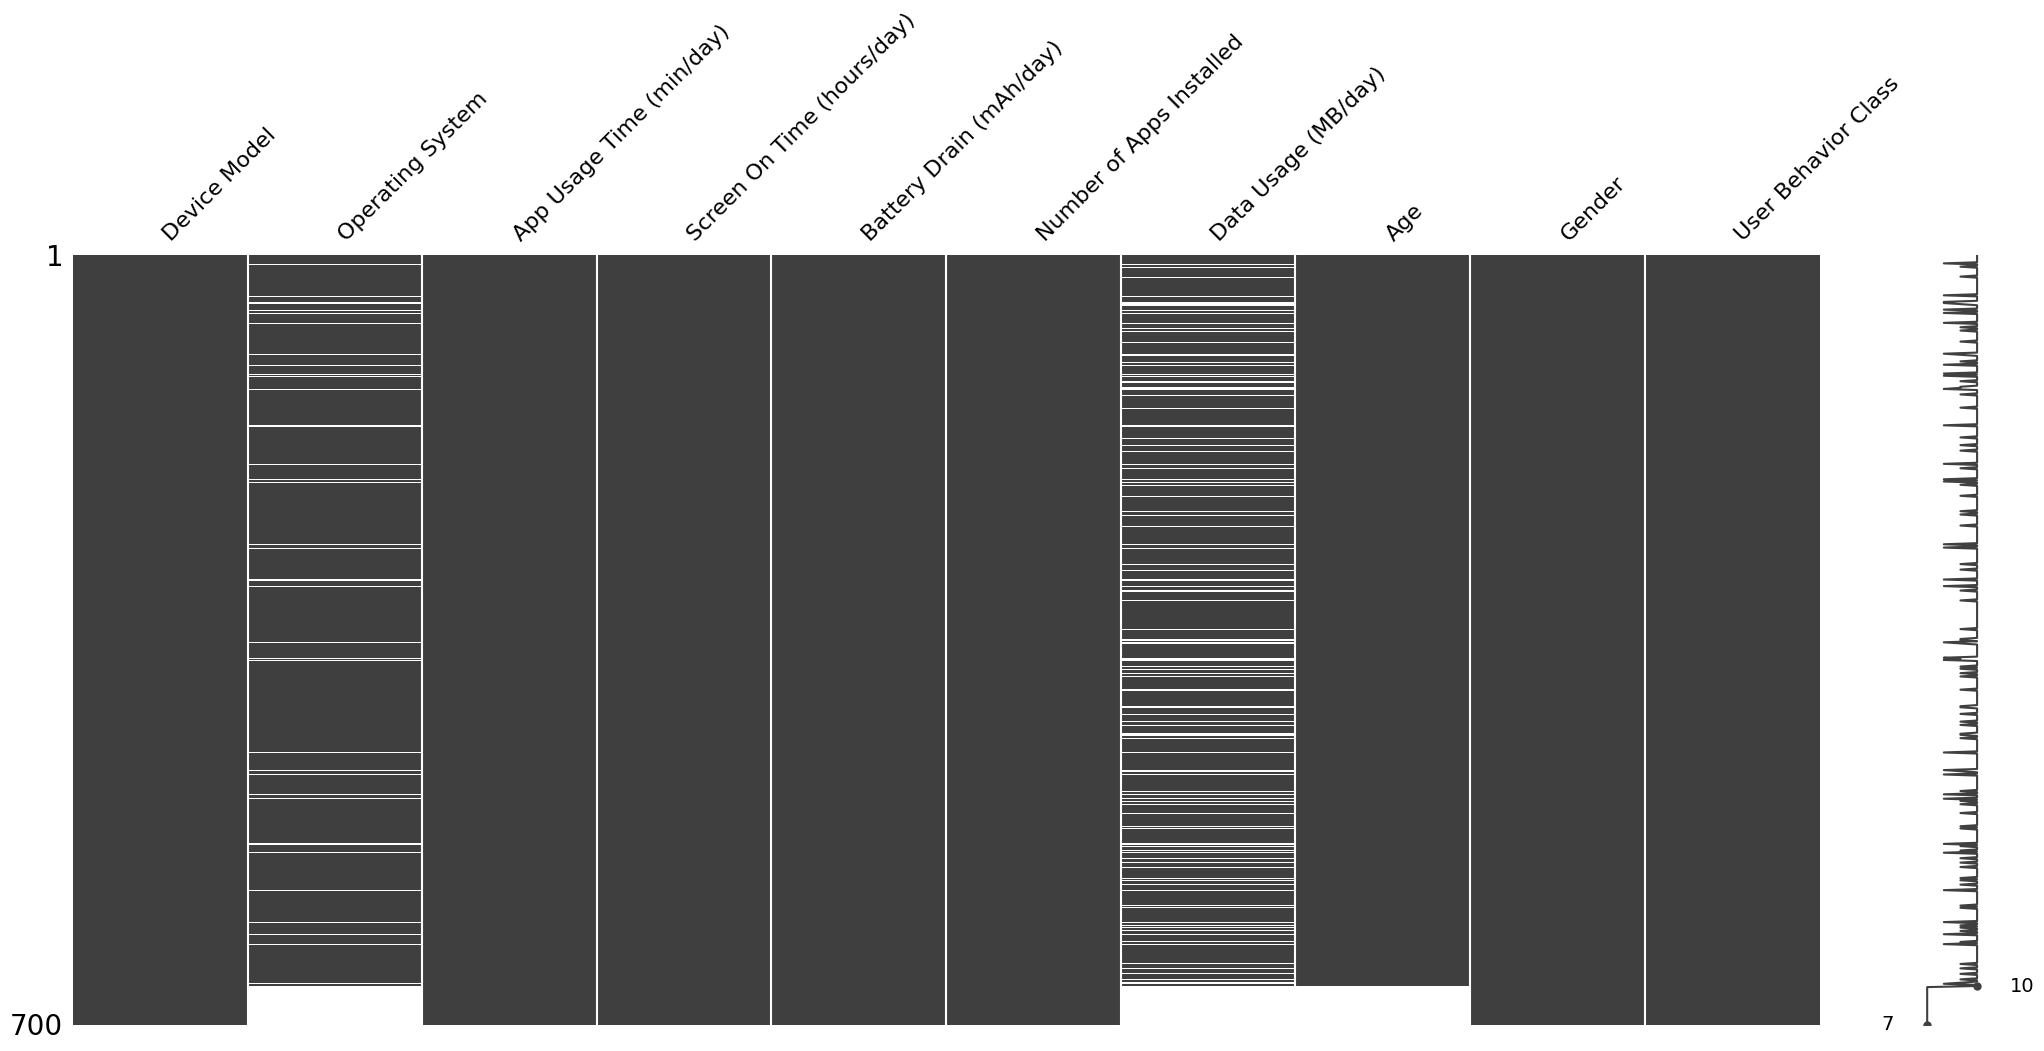

In [63]:
msno.matrix(data.sort_values('Age'))
plt.show()

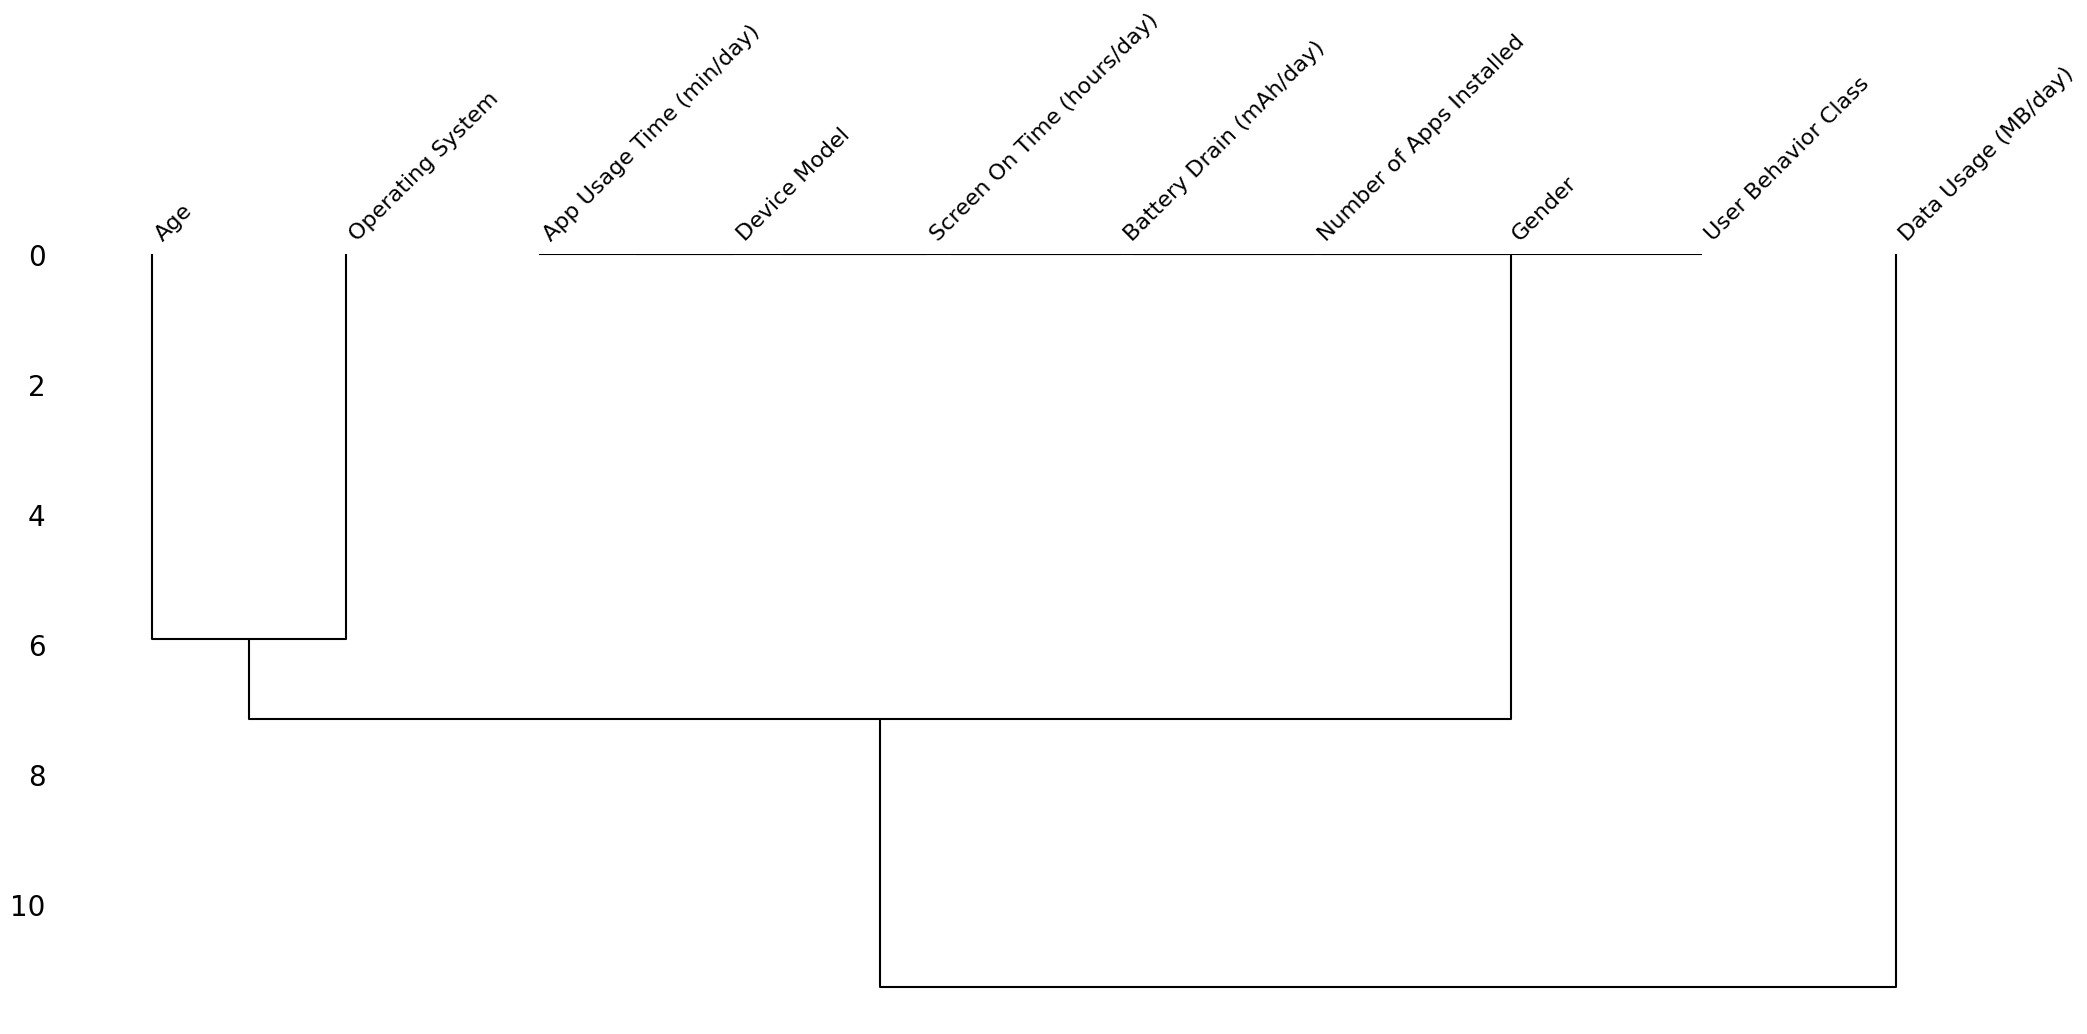

In [64]:
msno.dendrogram(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [66]:
from sklearn.experimental import enable_iterative_imputer

In [67]:
from sklearn.impute import IterativeImputer

In [71]:
mice = IterativeImputer(random_state=0)

imputed_values = mice.fit_transform(data[['Age', 'Operating System']])

data[['Age', 'Operating System']] = imputed_values

data['Age'] = data['Age'].round().astype(int)
data['Operating System'] = data['Operating System'].round().astype(int)

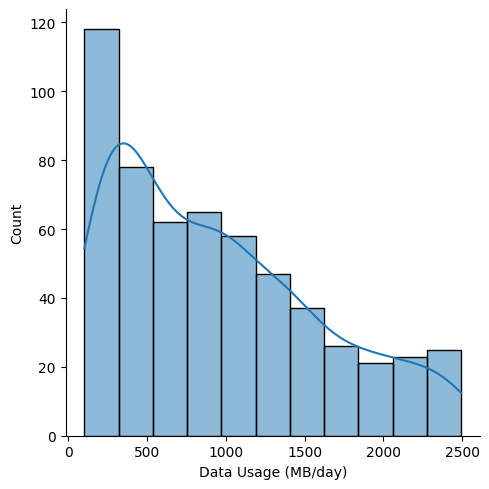

In [75]:
sns.displot(data['Data Usage (MB/day)'], kde=True)
plt.show()

In [77]:
data['Data Usage (MB/day)'].median()

827.5

In [79]:
data['Data Usage (MB/day)'] = data['Data Usage (MB/day)'].fillna(data['Data Usage (MB/day)'].median())

In [80]:
data.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [124]:
X, Y = data.drop(columns=['User Behavior Class']), data['User Behavior Class']

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

## Feature Scaling
Standardize the features appropriately.

In [113]:
# Write your code here. Add as many boxes as you need.

In [118]:
data.head(10)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0.0,0,393,6.4,1872,67,1122.0,40,1.0,4
1,1.0,0,268,4.7,1331,42,944.0,47,0.0,3
2,3.0,0,154,4.0,761,32,827.5,42,1.0,2
3,0.0,0,239,4.8,1676,56,871.0,20,1.0,3
4,4.0,1,187,4.3,1367,58,988.0,31,0.0,3
5,0.0,0,99,2.0,940,35,564.0,31,1.0,2
6,2.0,0,350,7.3,1802,66,827.5,21,0.0,4
7,1.0,0,543,11.4,2956,82,1702.0,31,1.0,5
8,2.0,0,340,7.7,2138,75,1053.0,42,0.0,4
9,4.0,1,424,6.6,1957,75,1301.0,42,1.0,4


In [122]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [126]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
data['User Behavior Class'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [127]:
data.head(20)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0.0,0,393,6.4,1872,67,1122.0,40,1.0,4
1,1.0,0,268,4.7,1331,42,944.0,47,0.0,3
2,3.0,0,154,4.0,761,32,827.5,42,1.0,2
3,0.0,0,239,4.8,1676,56,871.0,20,1.0,3
4,4.0,1,187,4.3,1367,58,988.0,31,0.0,3
5,0.0,0,99,2.0,940,35,564.0,31,1.0,2
6,2.0,0,350,7.3,1802,66,827.5,21,0.0,4
7,1.0,0,543,11.4,2956,82,1702.0,31,1.0,5
8,2.0,0,340,7.7,2138,75,1053.0,42,0.0,4
9,4.0,1,424,6.6,1957,75,1301.0,42,1.0,4


In [106]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [107]:
Y_pred = knn.predict(X_test)

In [108]:
knn.score(X_test, Y_test)

1.0

Assess the performance of the model by using different classification metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
accuracy_score(Y_test, Y_pred)

1.0

In [103]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [129]:
best_params

{'n_neighbors': 5}

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [111]:
Y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

print(classification_report(Y_test, Y_pred))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

